# Wage Classification Using ANNs with Keras

### Problem

Wealth inequality is a widespread global issue, with the wealth gap of most countries increasing year on year. If it is possible to predict how wealthy a person will be given a certain set of features, then efforts can be made to make options available to the general public that will allow them the same opertunities as others and hopefully close the wealth gap. For example if it transpires that having some form of higher education increases your chances have having a higher paid job then it is in the interest of the state to make this as accessible as possible.

### Approach

This dataset is a census that contains 14 input variables and a target variable that we are trying to classify. The target variable is a binary classification; whether someone earns more or less than $50'000. There are interval, ordinal and nominal data types so careful consideration has to be taken when applying the machine learning method. When pre-processing the data I have identified redundent variables, combined any relevent variables and modified any vairables with a skew. The aim of this project is to classify the income classes with as high accuracy as possible, this will be done by training different neural networks and comparing their accuracy. One problem that may occur is that this is an imbalanced dataset and so we will look at ways in which this can be overcome.

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import math
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from mlxtend.plotting import plot_confusion_matrix

In [2]:
#Name of the Variables

headers = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation',
           'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

In [3]:
#Load Dataset into a DataFrame

adult = pd.read_csv("C:\\Users\\as17s\\OneDrive\\Documents\\MSc Data Science\\Semester 2\\Data Mining\\SAS\\adult.txt", names = headers, na_values = ' ?')


### Data Cleaning

Missing values can be dealt with in a few ways, I have decided to remove all instances with a missing value as the dataset is large enough that I do not think it would alter our results a significant amount.

In [4]:
#Drop missing values and convert dataframe into an array to deal with indexing issues occured when dropping values

adult = adult.dropna()
adult = np.array(adult)

In [5]:
#Convert back to DataFrame

adult = pd.DataFrame(data = adult, columns = headers)

In [6]:
#Check indexing is correct

adult.head(20)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [7]:
adult.shape

(30162, 15)

In [8]:
#identify the target variable

target = adult['income']
counter = Counter(target)
counter

Counter({' <=50K': 22654, ' >50K': 7508})

We can see here the massive imbalance in our dataset

In [9]:
#Check the balance of the dataset

a = counter[' <=50K']
b = counter[' >50K']
l = len(adult)
print('Class = <=50k, Count =  %s, Percentage =  %s '%(a, a/l*100) + '%')
print('Class = >50k, Count = %s, Percentage = %s '%(b, b/l*100) + '%')

Class = <=50k, Count =  22654, Percentage =  75.10775147536636 %
Class = >50k, Count = 7508, Percentage = 24.892248524633644 %


### Data Preprocessing & Exploration

Here we will do some basic exploration of our data preprocess our data, we shall convert the relevent variables into binary, including our target value. This is important so we can see any correlations between the target variable and the other ionput variables.

In [10]:
#Convert target values into binary

adult['income'][0]
for i in range(len(adult)):
    if adult['income'][i] == ' <=50K':
        adult['income'][i] = 0
    else:
        adult['income'][i] = 1      
        

In [11]:
# Convert sex into binary

for i in range(len(adult)):    
    if adult['sex'][i] == ' Male':
        adult['sex'][i] = 1
    else:
        adult['sex'][i] = 0

In [12]:
adult.dtypes

age               object
workclass         object
fnlwgt            object
education         object
education-num     object
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain      object
capital-loss      object
hours-per-week    object
native-country    object
income            object
dtype: object

In [13]:
#Correct type issues

adult = adult.astype({'income': 'int64', 'sex':'int64', 'age':'int64', 'fnlwgt':'int64', 'education-num':'int64'
               , 'capital-gain':'int64', 'capital-loss':'int64', 'hours-per-week':'int64'})
adult.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex                int64
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income             int64
dtype: object

In [14]:
#How are the variables correclated? we see 'fnlwgt' will not offer any insight into income

adult.corr()

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,income
age,1.000000,-0.076511,0.043526,0.081993,0.080154,0.060165,0.101599,0.241998
fnlwgt,-0.076511,1.000000,-0.044992,0.025362,0.000422,-0.009750,-0.022886,-0.008957
education-num,0.043526,-0.044992,1.000000,0.006157,0.124416,0.079646,0.152522,0.335286
sex,0.081993,0.025362,0.006157,1.000000,0.048814,0.047011,0.231268,0.216699
capital-gain,0.080154,0.000422,0.124416,0.048814,1.000000,-0.032229,0.080432,0.221196
capital-loss,0.060165,-0.009750,0.079646,0.047011,-0.032229,1.000000,0.052417,0.150053
hours-per-week,0.101599,-0.022886,0.152522,0.231268,0.080432,0.052417,1.000000,0.229480
income,0.241998,-0.008957,0.335286,0.216699,0.221196,0.150053,0.229480,1.000000


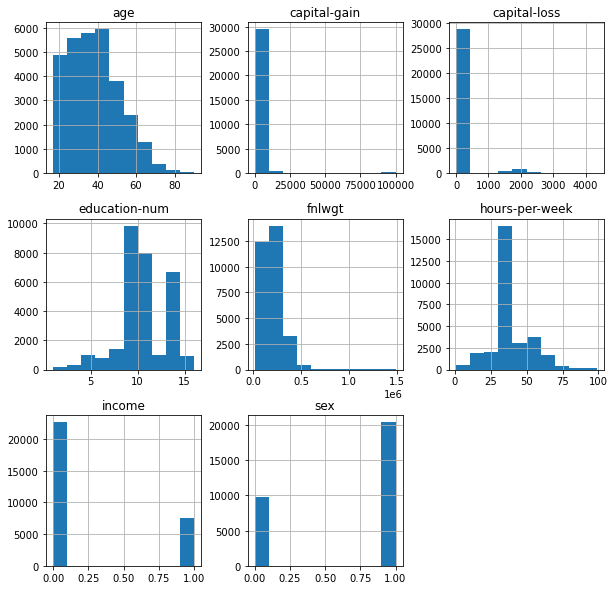

In [15]:
#Generate histograms for basic data exploration, Age has a right hand skew

adult.hist(figsize = (10, 10))
plt.show()

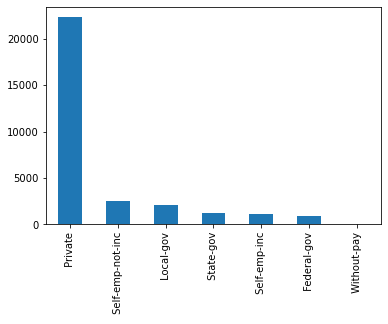

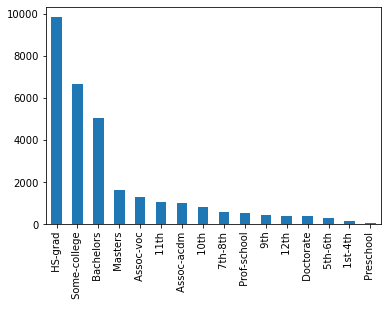

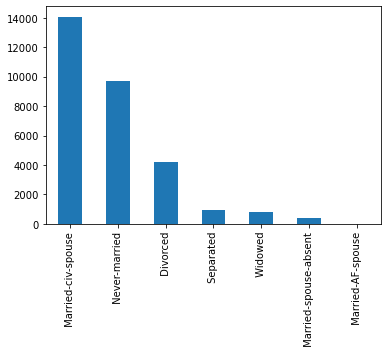

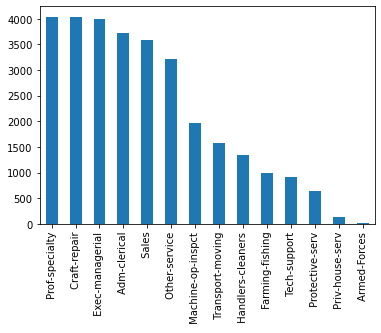

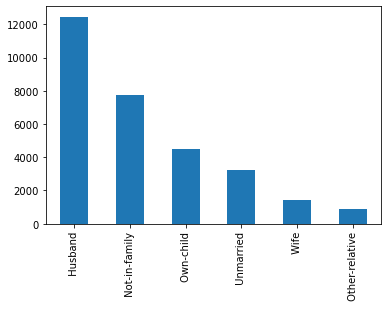

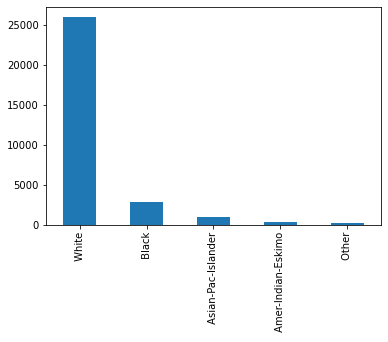

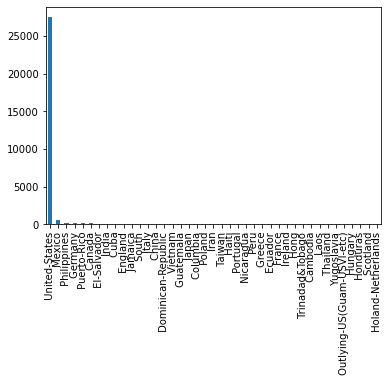

In [16]:
object1 = adult.select_dtypes(include = ['object']).columns

for i in object1:
    adult[i].value_counts().plot(kind = 'bar')
    plt.show()

In [17]:
# Many more instances from the united states so decided to display native country in binary representing from 
# united states and other.


for i in range(len(adult)):    
    if adult['native-country'][i] == ' United-States':
        adult['native-country'][i] = 1
    else:
        adult['native-country'][i] = 0

<ipython-input-17-a491e99b33a9>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult['native-country'][i] = 1
<ipython-input-17-a491e99b33a9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult['native-country'][i] = 0


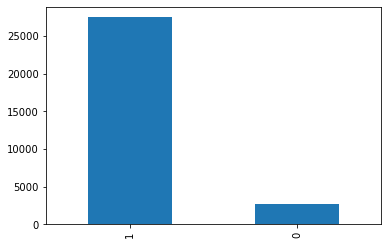

In [18]:
adult['native-country'].value_counts().plot(kind = 'bar')

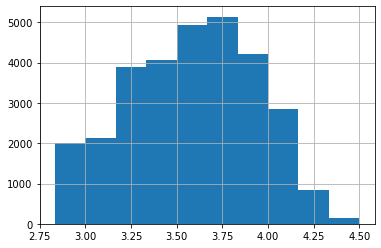

In [19]:
np.log(adult['age']).hist()

As 'capital-gain' & 'capital-loss' essentially represent the same thing we can combine these varibales into one column. The age variable has a right hand skew and so applying a logorithm function to this variable it now more follows a normal distribution.

In [20]:
# Capital-gain & capital-loss can be combined into one column, we also correct the issure of right hand skew in age
# by applying the natural logorithm to each value

adult['capital-net-gain'] = adult['capital-gain'] - adult['capital-loss']
adult['log-age'] = np.log(adult['age'])

In [21]:
# Drop irrelevant columns, education is represented by education-num and so is made redundant. Occupation will cover workclass
# and as we see before 'fnlwgt' offers no insight to target income.

adult.drop(columns = ['age', 'capital-gain', 'capital-loss', 'workclass', 'fnlwgt', 'education'], inplace = True)

In [22]:
adult.head()

,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,income,capital-net-gain,log-age
0,13,Never-married,Adm-clerical,Not-in-family,White,1,40,1,0,2174,3.663562
1,13,Married-civ-spouse,Exec-managerial,Husband,White,1,13,1,0,0,3.912023
2,9,Divorced,Handlers-cleaners,Not-in-family,White,1,40,1,0,0,3.637586
3,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,40,1,0,0,3.970292
4,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,40,0,0,0,3.332205


In [23]:
adult = adult.astype({'native-country':'int64'})
target = target.astype('int64')

In [24]:
adult.dtypes

education-num         int64
marital-status       object
occupation           object
relationship         object
race                 object
sex                   int64
hours-per-week        int64
native-country        int64
income                int64
capital-net-gain      int64
log-age             float64
dtype: object

Now we need to deal with the categorical variables so they can be read by the machine learning method, this is done by creating dummy variables for each level of a variable. If an instance has this level then the dummy variable displays the number 1. 

In [25]:
# One hot encode the categorical data in order for it to be readable by a machine learning method.

adult_hotcat = pd.get_dummies(adult.select_dtypes('object'))
adult_notcat = adult.select_dtypes(exclude = 'object').drop(['income'], axis = 1)
adult_hot = pd.concat([adult_hotcat, adult_notcat], axis = 1, join = 'inner')

In [26]:
adult_hot

,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,...,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,education-num,sex,hours-per-week,native-country,capital-net-gain,log-age
0,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,13,1,40,1,2174,3.663562
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,13,1,13,1,0,3.912023
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,9,1,40,1,0,3.637586
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,7,1,40,1,0,3.970292
4,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,13,0,40,0,0,3.332205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,12,0,38,1,0,3.295837
30158,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,9,1,40,1,0,3.688879
30159,0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,9,0,40,1,0,4.060443
30160,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,9,1,20,1,0,3.091042


## Implementation of Neural Networks

In this section I shall implement the machine learning method, I will take the following steps:
- Split data into test and train.
- Scale the data accordingly.
- Run different models with differing number of nodes, layers and different activation functions.
- Compare the accuracies of all these models and plot confusion matrices.

In [27]:
#Solit data into train and test data

train_data, test_data, train_label, test_label = train_test_split(adult_hot, target, test_size = 0.2)

In [28]:
#Scale the data

scaler = StandardScaler()

scaler.fit(train_data)
train_datas = scaler.transform(train_data)

test_datas = scaler.transform(test_data)

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import initializers
from tensorflow.keras.optimizers import SGD, Adam

In [30]:
monitor_val_acc = EarlyStopping(monitor = 'val_accuracy', patience = 5)
my_optimizer = SGD(lr = 0.01)

In [38]:
#Defined model

model = Sequential()
model.add(Dense(20, input_shape = (38,), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                780       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


In [39]:
#Store the model so its history can be called back

hist = model.fit(train_datas, train_label, epochs = 2000, validation_data = (test_datas, test_label),
                 callbacks = [monitor_val_acc])

Epoch 1/2000
755/755 [==============================] - 1s 805us/step - loss: 0.3849 - accuracy: 0.8148 - val_loss: 0.3401 - val_accuracy: 0.8400
Epoch 2/2000
755/755 [==============================] - 1s 671us/step - loss: 0.3401 - accuracy: 0.8392 - val_loss: 0.3322 - val_accuracy: 0.8430
Epoch 3/2000
755/755 [==============================] - 1s 673us/step - loss: 0.3338 - accuracy: 0.8417 - val_loss: 0.3295 - val_accuracy: 0.8449
Epoch 4/2000
755/755 [==============================] - 1s 682us/step - loss: 0.3307 - accuracy: 0.8438 - val_loss: 0.3283 - val_accuracy: 0.8434
Epoch 5/2000
755/755 [==============================] - 1s 681us/step - loss: 0.3284 - accuracy: 0.8452 - val_loss: 0.3266 - val_accuracy: 0.8445
Epoch 6/2000
755/755 [==============================] - 1s 705us/step - loss: 0.3262 - accuracy: 0.8465 - val_loss: 0.3257 - val_accuracy: 0.8473
Epoch 7/2000
755/755 [==============================] - 1s 682us/step - loss: 0.3253 - accuracy: 0.8471 - val_loss: 0.3256 -

In [40]:
#Display test and train accuracy

train_loss, train_acc = model.evaluate(train_datas, train_label, verbose = False)
test_loss, test_acc = model.evaluate(test_datas, test_label, verbose = False)
print('Train Accuracy: ' + str(train_acc))
print('Test Accuracy: ' + str(test_acc))

Train Accuracy: 0.8520867228507996
Test Accuracy: 0.8518150448799133


In [41]:
# Gather values to be plotted

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

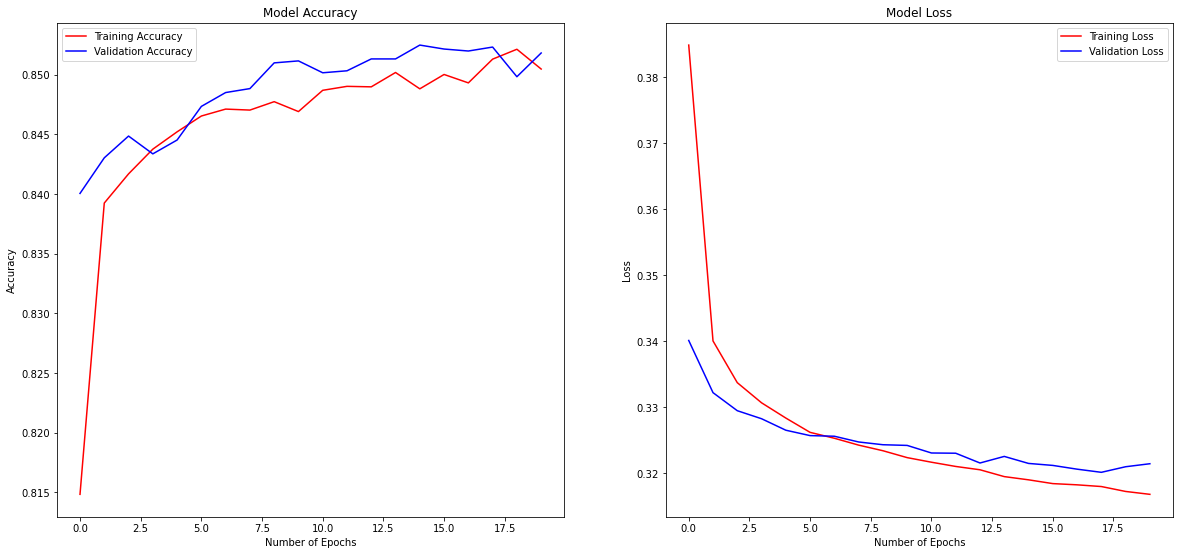

In [42]:
# Plot accuracy & loss

plt.figure(figsize = (20, 20))
plt.subplot(2, 2, 1)
plt.plot(acc, 'r', label = 'Training Accuracy')
plt.plot(val_acc, 'b', label = 'Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
#plt.show()

#plt.figure()
plt.subplot(2, 2, 2)
plt.plot(loss, 'r', label = 'Training Loss')
plt.plot(val_loss, 'b', label = 'Validation Loss')
plt.title('Model Loss')
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

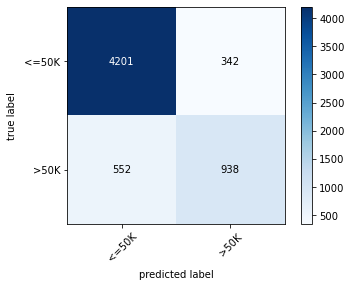

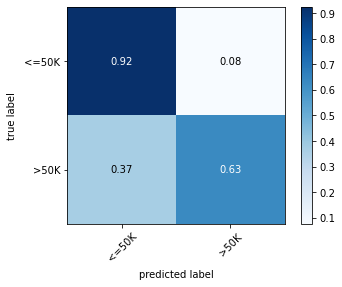

In [43]:
# plot confusion matrix

preds = np.round(model.predict(test_datas))

class_names = np.array([' <=50K', '>50K'])

cm = confusion_matrix(np.array(test_label), preds)

plot_confusion_matrix(conf_mat = cm, class_names = class_names, colorbar = True)
plot_confusion_matrix(conf_mat = cm, class_names = class_names, show_absolute = False, show_normed = True, colorbar = True)
plt.show()

In [44]:
# Always use sigmoid in output layer as binary classification problem

def get_model1(act, num):
    model = Sequential()
    model.add(Dense(num, input_shape = (38,), activation = act))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(loss = 'binary_crossentropy',  metrics = ['accuracy'])
    
    return model

def get_model2(act, num):
    model = Sequential()
    model.add(Dense(num, input_shape = (38,), activation = act))
    model.add(Dense(num, activation = act))
    model.add(Dense(1, activation = 'sigmoid'))
    model.compile(loss = 'binary_crossentropy',  metrics = ['accuracy'])
    
    return model

In [47]:
# Train a model with different activation functions to decide on best one, the count lets us know how far along the training
# of the models is.

activations = ['relu', 'sigmoid', 'tanh', 'softmax']

nodes = [5, 10, 20 , 30, 40, 50]

act_result = {}
act_result2 = {}

count = 0

for act in activations:
    for nod in nodes:
        model2 = get_model1(act, nod)
        model22 = get_model2(act, nod)
        h_callback = model2.fit(train_datas, train_label, validation_data = (test_datas, test_label), epochs = 1000, 
                                callbacks = [monitor_val_acc], verbose = 0)
        h_callback2 = model22.fit(train_datas, train_label, validation_data = (test_datas, test_label), epochs = 1000,
                                callbacks = [monitor_val_acc], verbose = 0)
        act_result[act + str(nod)] = h_callback
        act_result2[act + str(nod)] = h_callback2
        count += 1
        print(str(count))                         
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


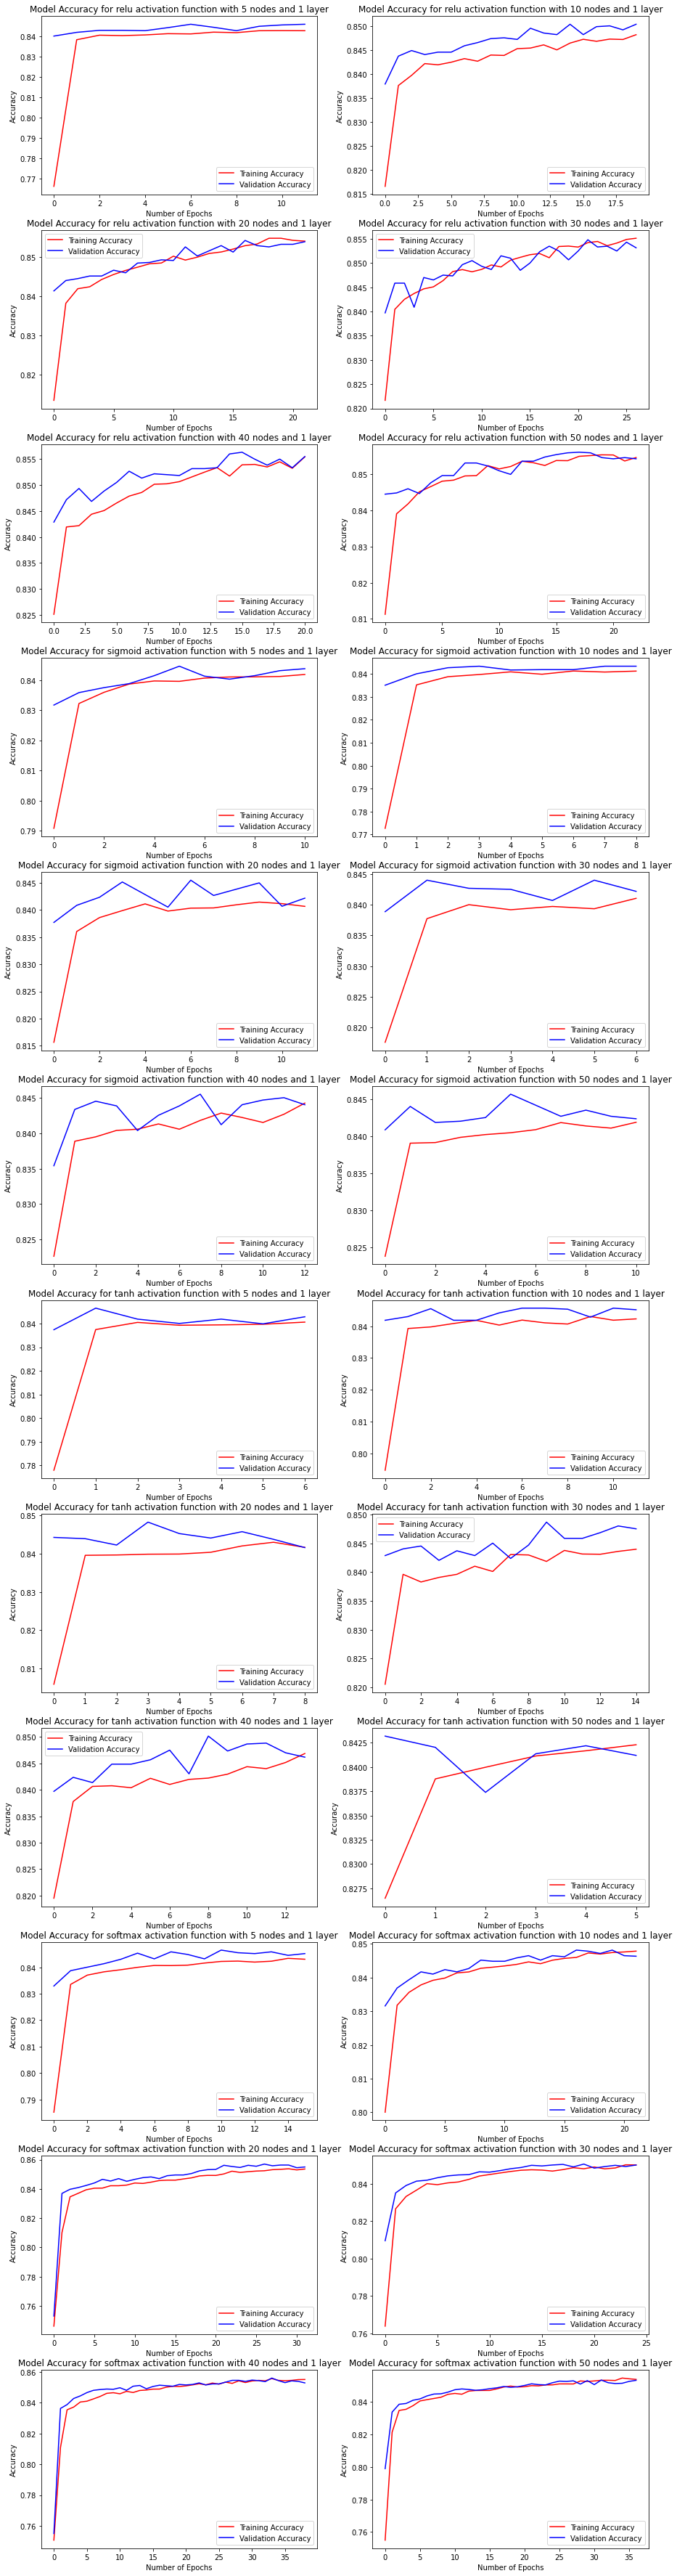

In [48]:
# Plot accuracy and loss for each activation function
plt.figure(figsize= (15, 75))
count = 1
for act in activations:
    for nod in nodes:
        plt.subplot(14, 2, count)
        plt.plot(act_result[act + str(nod)].history['accuracy'], 'r', label = 'Training Accuracy')
        plt.plot(act_result[act+ str(nod)].history['val_accuracy'], 'b', label = 'Validation Accuracy')
        plt.title('Model Accuracy for ' + act + ' activation function' + ' with ' + str(nod) + ' nodes' + ' and 1 layer')
        plt.xlabel('Number of Epochs')
        plt.ylabel('Accuracy')
        plt.legend()        
        count += 1
plt.show()


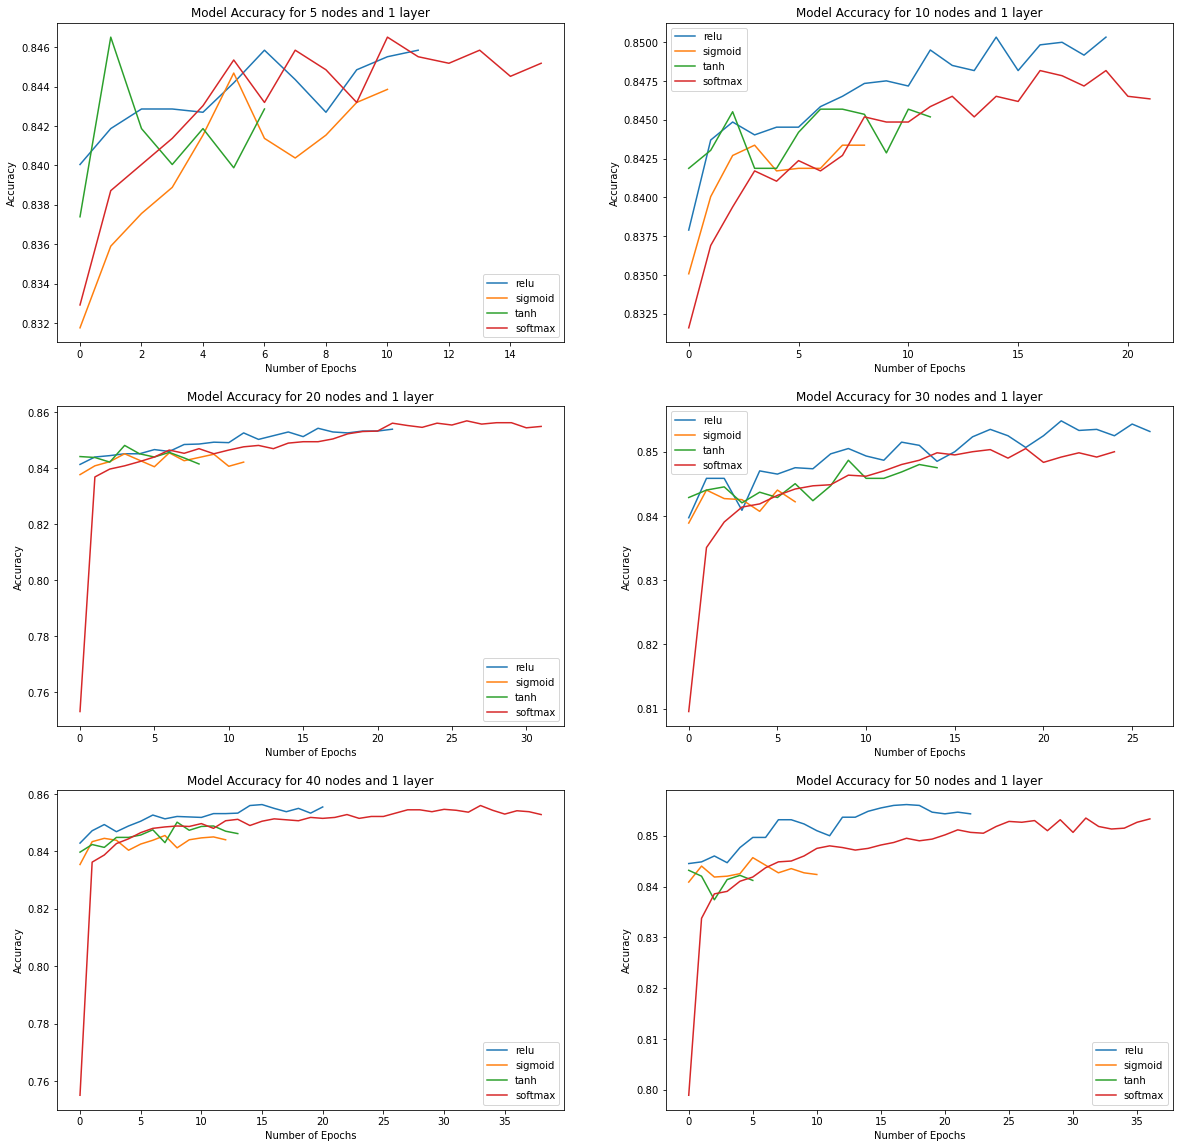

In [49]:
# see acccuracy for each activation funciton on one graph for more comparibility
plt.figure(figsize = (20, 20))
count = 1
for nod in nodes:
    plt.subplot(3, 2, count)
    count += 1
    for act in activations:
        plt.plot(act_result[act + str(nod)].history['val_accuracy'], label = act)
    plt.title('Model Accuracy for ' +  str(nod) + ' nodes and 1 layer' )
    plt.xlabel('Number of Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
plt.show()

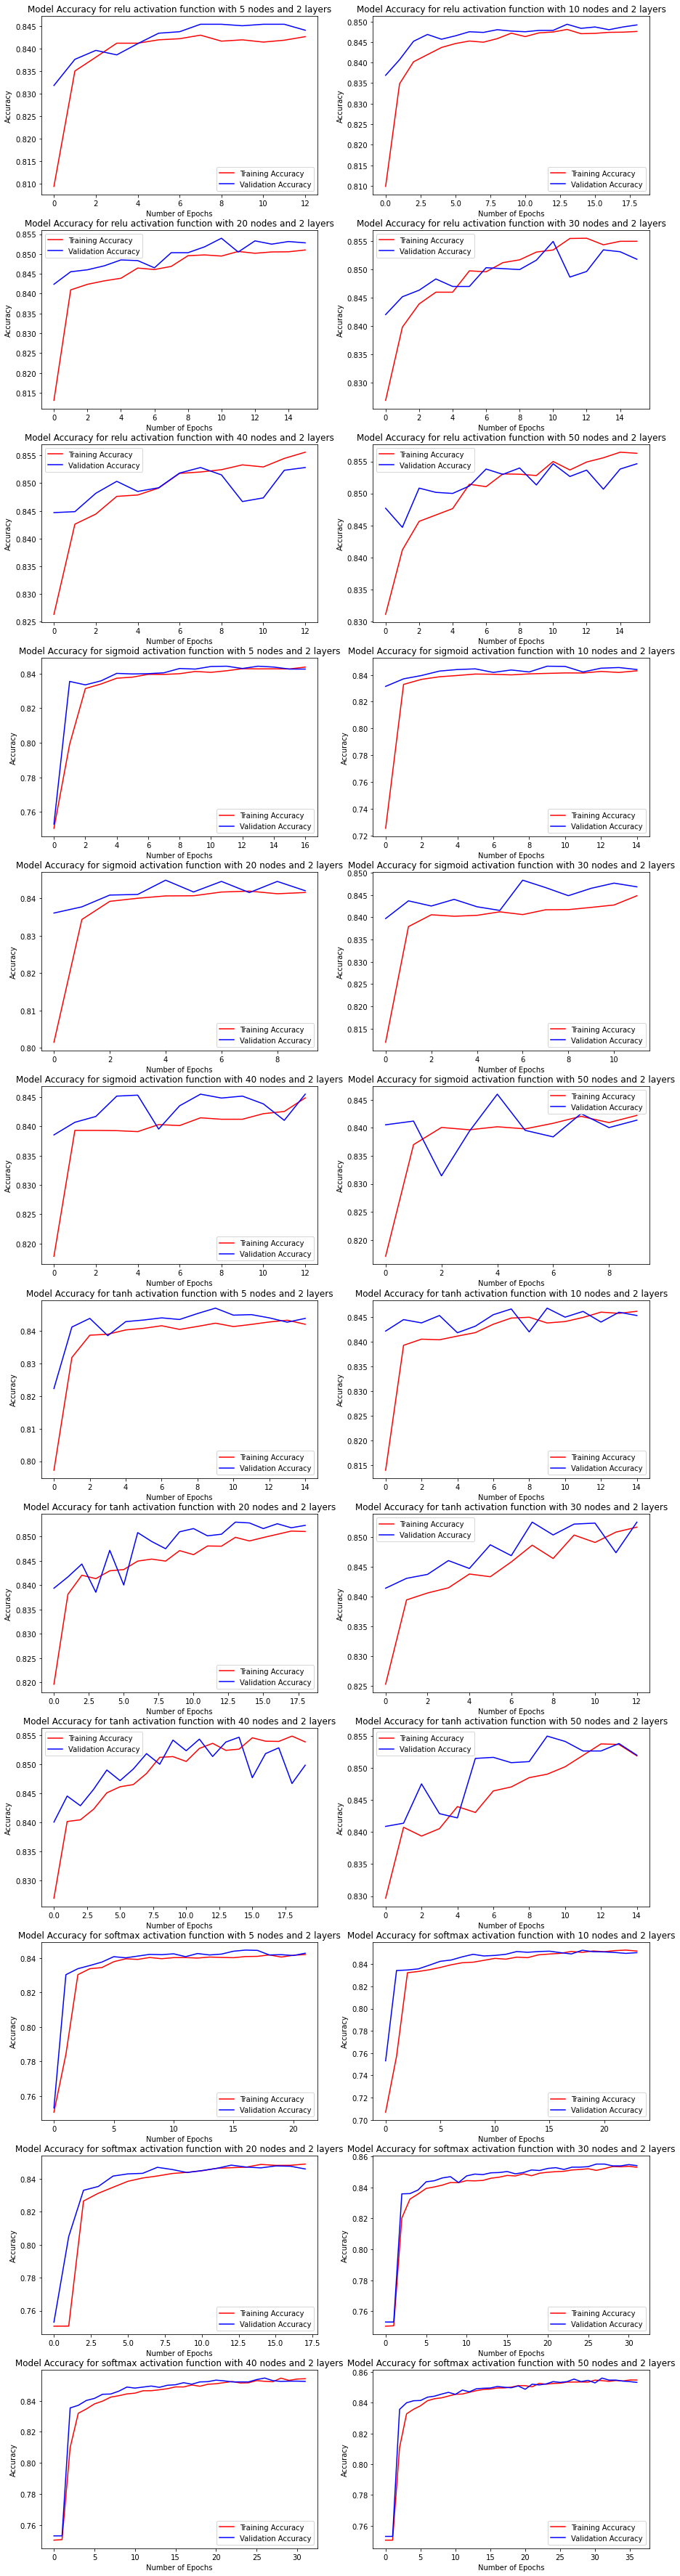

In [50]:
plt.figure(figsize= (15, 75))
count = 1
for act in activations:
    for nod in nodes:
        plt.subplot(14, 2, count)
        plt.plot(act_result2[act + str(nod)].history['accuracy'], 'r', label = 'Training Accuracy')
        plt.plot(act_result2[act+ str(nod)].history['val_accuracy'], 'b', label = 'Validation Accuracy')
        plt.title('Model Accuracy for ' + act + ' activation function' + ' with ' + str(nod) + ' nodes' + ' and 2 layers')
        plt.xlabel('Number of Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        count += 1
plt.show()

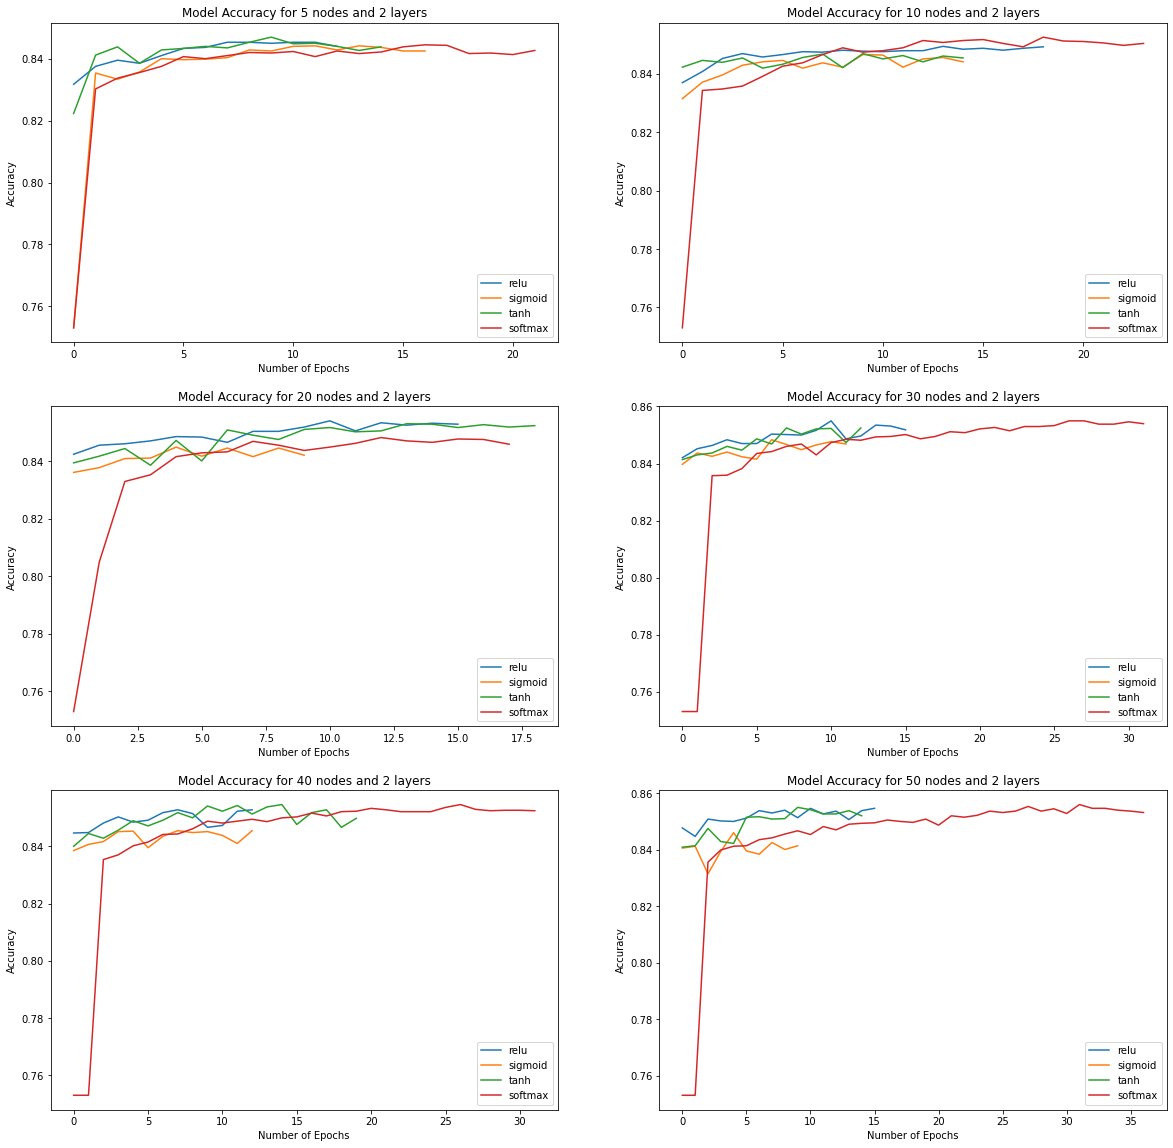

In [51]:
plt.figure(figsize = (20,20))
count = 1
for nod in nodes:
    plt.subplot(3, 2, count)
    count += 1
    for act in activations:
        plt.plot(act_result2[act + str(nod)].history['val_accuracy'], label = act)
    plt.title('Model Accuracy for ' +  str(nod) + ' nodes and 2 layers' )
    plt.xlabel('Number of Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
plt.show()

In [52]:
#  Get activation function that delivers the highest validation accuracy

val_accs = {}
val_accs2 = {}

for act in activations:
    for nod in nodes:
        val_accs[act + str(nod)] = act_result[act + str(nod)].history['val_accuracy'][-1]
        val_accs2[act + str(nod)] = act_result2[act + str(nod)].history['val_accuracy'][-1]

In [53]:
print('For 1 layer the max accuracy is -  %s : %s' % (max(val_accs, key=val_accs.get), val_accs[max(val_accs, key=val_accs.get)]))
print('For 2 layers the max accuracy is -  %s : %s' % (max(val_accs2, key=val_accs2.get), val_accs[max(val_accs2, key=val_accs2.get)]))

For 1 layer the max accuracy is -  relu40 : 0.8554616570472717
For 2 layers the max accuracy is -  relu50 : 0.8543013334274292


Highest accuracy is a neural network with 1 hidden layer with 40 nodes and using the relu activation function so we construct that model to see the confusion matrix

In [66]:
model = Sequential()
model.add(Dense(40, input_shape = (38,), activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_58"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_143 (Dense)            (None, 40)                1560      
_________________________________________________________________
dense_144 (Dense)            (None, 1)                 41        
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [67]:
hist = model.fit(train_datas, train_label, epochs = 100, validation_data = (test_datas, test_label), callbacks = [monitor_val_acc])

Epoch 1/100
755/755 [==============================] - 1s 816us/step - loss: 0.3700 - accuracy: 0.8235 - val_loss: 0.3374 - val_accuracy: 0.8434
Epoch 2/100
755/755 [==============================] - 1s 749us/step - loss: 0.3360 - accuracy: 0.8396 - val_loss: 0.3309 - val_accuracy: 0.8462
Epoch 3/100
755/755 [==============================] - 1s 681us/step - loss: 0.3307 - accuracy: 0.8423 - val_loss: 0.3280 - val_accuracy: 0.8465
Epoch 4/100
755/755 [==============================] - 1s 753us/step - loss: 0.3282 - accuracy: 0.8441 - val_loss: 0.3267 - val_accuracy: 0.8475
Epoch 5/100
755/755 [==============================] - 1s 686us/step - loss: 0.3258 - accuracy: 0.8451 - val_loss: 0.3243 - val_accuracy: 0.8482
Epoch 6/100
755/755 [==============================] - 1s 707us/step - loss: 0.3245 - accuracy: 0.8462 - val_loss: 0.3241 - val_accuracy: 0.8507
Epoch 7/100
755/755 [==============================] - 1s 702us/step - loss: 0.3236 - accuracy: 0.8466 - val_loss: 0.3239 - val_ac

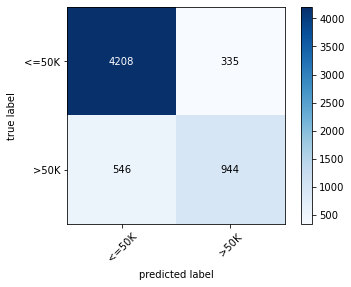

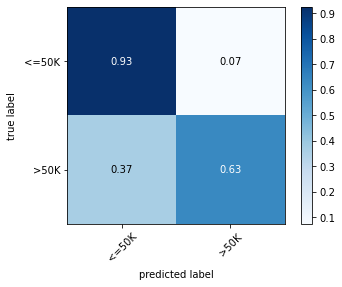

In [69]:
preds = np.round(model.predict(test_datas))
    
class_names = np.array([' <=50K', '>50K'])

cm = confusion_matrix(np.array(test_label), preds)

plot_confusion_matrix(conf_mat = cm, class_names = class_names, colorbar = True)
plot_confusion_matrix(conf_mat = cm, class_names = class_names, show_absolute = False, show_normed = True, colorbar = True)
plt.show()

Now we shall test a variety of batch sizes

In [70]:
def get_batch_model():    
    model = Sequential()
    model.add(Dense(40, input_shape = (38,), activation = 'relu', kernel_initializer = 'normal'))
    model.add(BatchNormalization())
    model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'normal'))
    model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    
    return model

In [81]:
#Test model using different batch sizes
batch_size = [10, 20, 50, 100, 200, 500, 1000]

batch_result = {}
count = 0

for batch in batch_size:
    
    model = get_batch_model()
    h_callback = model.fit(train_datas, train_label, validation_data = (test_datas, test_label), epochs = 1000, 
                            batch_size = batch, callbacks = [monitor_val_acc], verbose = 0)

    batch_result['batch_size: ' + str(batch)] = h_callback
        
    count += 1
    print(str(count))      




1
2
3
4
5
6
7


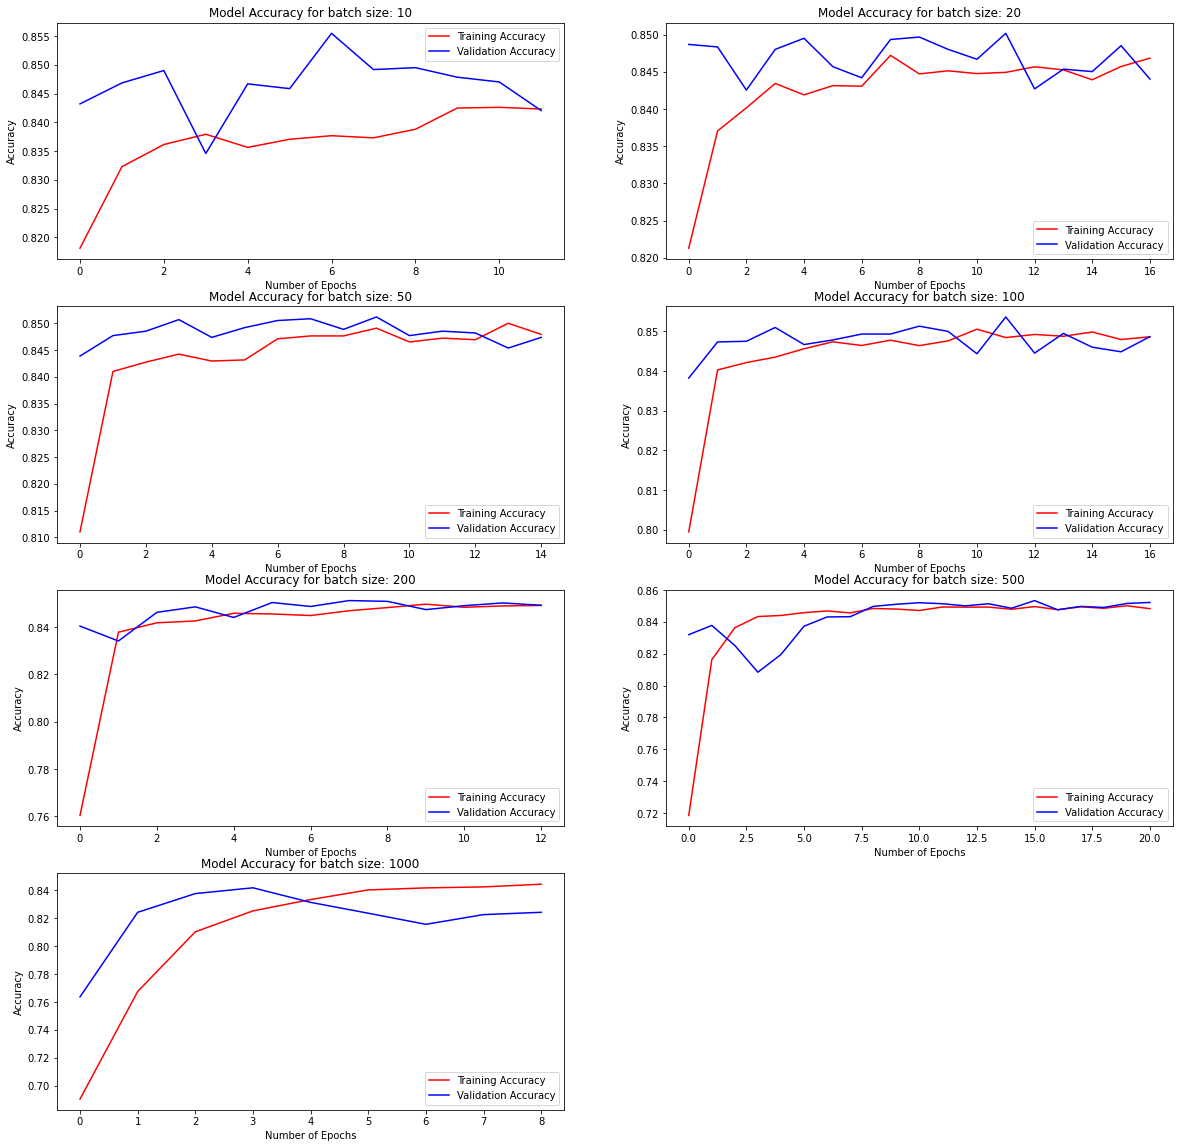

In [82]:
plt.figure(figsize = (20,20))
count=1
for batch in batch_size:
    plt.subplot(4, 2, count)
    plt.plot(batch_result['batch_size: ' + str(batch)].history['accuracy'], 'r', label = 'Training Accuracy')
    plt.plot(batch_result['batch_size: ' + str(batch)].history['val_accuracy'], 'b', label = 'Validation Accuracy')
    plt.title('Model Accuracy for batch size: ' + str(batch))
    plt.xlabel('Number of Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    count+=1
plt.show()


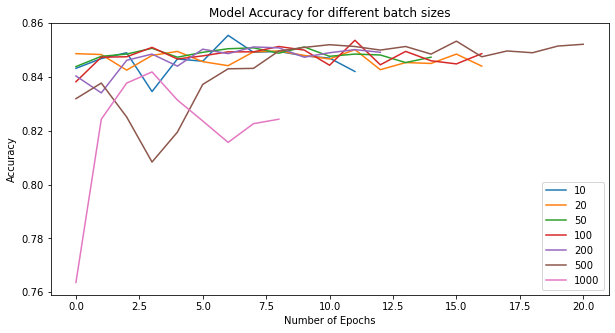

In [83]:
plt.figure(figsize = (10,5))

for batch in batch_size:
    plt.plot(batch_result['batch_size: ' + str(batch)].history['val_accuracy'], label = str(batch))
plt.title('Model Accuracy for different batch sizes' )
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [84]:
batch_accs = {}

for batch in batch_size:
    batch_accs['batch_size: ' + str(batch)] = batch_result['batch_size: ' + str(batch)].history['val_accuracy'][-1]
        

In [85]:
print('The batch size that gives the greatest accuracy -  %s : %s' % (max(batch_accs, key=batch_accs.get), batch_accs[max(batch_accs, key=batch_accs.get)]))

The batch size that gives the greatest accuracy -  batch_size: 500 : 0.8521465063095093


In [92]:
model = Sequential()
model.add(Dense(40, input_shape = (38,), activation = 'relu', kernel_initializer = 'normal'))
model.add(BatchNormalization())
model.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'normal'))
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_193 (Dense)            (None, 40)                1560      
_________________________________________________________________
batch_normalization_24 (Batc (None, 40)                160       
_________________________________________________________________
dense_194 (Dense)            (None, 1)                 41        
Total params: 1,761
Trainable params: 1,681
Non-trainable params: 80
_________________________________________________________________


In [93]:
model.fit(train_datas, train_label, validation_data = (test_datas, test_label), epochs = 1000, 
                            batch_size = 500, callbacks = [monitor_val_acc] )

Epoch 1/1000
49/49 [==============================] - 0s 4ms/step - loss: 0.5825 - accuracy: 0.6952 - val_loss: 0.5647 - val_accuracy: 0.8324
Epoch 2/1000
49/49 [==============================] - 0s 2ms/step - loss: 0.4655 - accuracy: 0.8060 - val_loss: 0.4785 - val_accuracy: 0.8342
Epoch 3/1000
49/49 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.8334 - val_loss: 0.4194 - val_accuracy: 0.8127
Epoch 4/1000
49/49 [==============================] - 0s 2ms/step - loss: 0.3597 - accuracy: 0.8419 - val_loss: 0.3833 - val_accuracy: 0.8137
Epoch 5/1000
49/49 [==============================] - 0s 2ms/step - loss: 0.3426 - accuracy: 0.8435 - val_loss: 0.3679 - val_accuracy: 0.8158
Epoch 6/1000
49/49 [==============================] - 0s 2ms/step - loss: 0.3334 - accuracy: 0.8442 - val_loss: 0.3465 - val_accuracy: 0.8394
Epoch 7/1000
49/49 [==============================] - 0s 2ms/step - loss: 0.3297 - accuracy: 0.8467 - val_loss: 0.3379 - val_accuracy: 0.8412
Epoch 

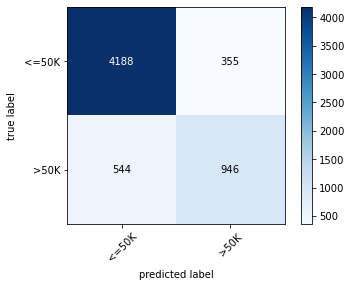

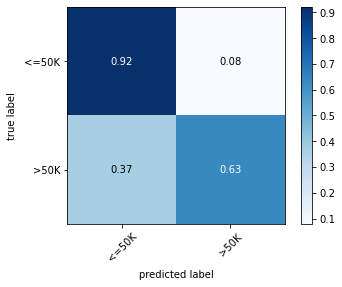

In [94]:
preds = np.round(model.predict(test_datas))
    
class_names = np.array([' <=50K', '>50K'])

cm = confusion_matrix(np.array(test_label), preds)

plot_confusion_matrix(conf_mat = cm, class_names = class_names, colorbar = True)
plot_confusion_matrix(conf_mat = cm, class_names = class_names, show_absolute = False, show_normed = True, colorbar = True)
plt.show()

As we can see from the confusion matrices for various models, they always predict the majority class with a greater accuracy than the minority class. We shall now look a couple of techniques to combat this issue.

### Majority Class Under-Sampling

Here we shall remove instances of the majority class in order to ballance the dataset. This should provide a more balanced accuracy for each class, however we remove a large amount of our dataset and so we shouldn't be surprised if overall accuracy decreases.

In [49]:
# Due to imbalanced data will train model with same amount of classes for each. Will first do this by removing 
# values from the dominant class until both are equal

In [95]:
counts = train_label.value_counts()
counts[1]
lenny = counts[0] - counts[1] - 1
lenny

12092

In [96]:
mission = pd.Series(data = np.array(train_label)) 
che = pd.DataFrame(data = np.array(train_data))

In [97]:
# Remove values

i = 0
count = 0

while count < lenny:
    if mission[i] == 0:
        mission = mission.drop(index = [i], inplace = False)
        che = che.drop(index = [i], inplace = False)
        count += 1
    i += 1

In [98]:
#Check similar class counts

mission.value_counts()

0    6019
1    6018
dtype: int64

In [99]:
#transform new training data and train same test data set

scaler2 = StandardScaler()

scaler2.fit(che)
che = scaler2.transform(che)

test_data_che = scaler2.transform(test_data)

In [107]:
model2 = Sequential()
model2.add(Dense(40, input_shape = (38,), activation = 'relu', kernel_initializer = 'normal'))
model.add(BatchNormalization())
model2.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'normal'))
model2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model2.summary()

Model: "sequential_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_199 (Dense)            (None, 40)                1560      
_________________________________________________________________
dense_200 (Dense)            (None, 1)                 41        
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [108]:
monitor_val_acc2 = EarlyStopping(monitor = 'val_accuracy', patience = 5)

In [109]:
hist2 = model2.fit(che, mission, validation_data = (test_data_che, test_label), epochs = 2000,
                   batch_size = 500, callbacks = [monitor_val_acc2], verbose = 0)

In [110]:
model2.evaluate(test_data_che, test_label)

189/189 [==============================] - 0s 434us/step - loss: 0.3904 - accuracy: 0.8039


[0.3904446065425873, 0.8039118051528931]

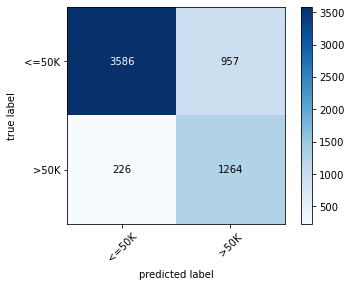

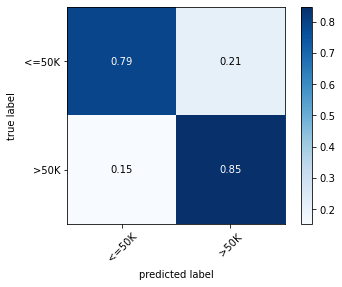

In [111]:
preds = np.round(model2.predict(test_data_che))
    
class_names = np.array([' <=50K', '>50K'])

cm = confusion_matrix(np.array(test_label), preds)

plot_confusion_matrix(conf_mat = cm, class_names = class_names, colorbar = True)
plot_confusion_matrix(conf_mat = cm, class_names = class_names, show_absolute = False, show_normed = True, colorbar = True)
plt.show()

The confusion matrix for this model shows that the classifications are more balanced, but the minority class now is classified higher than the majority class.

## SMOTE

Instead of undersampling the majority class we are now going to oversample our minority class. One way to do this would just be to duplicate many instances of the minority class, but we are going to use a technique called SMOTE. SMOTE generates new instances of the minority class by drawing lines between instances that are closs in the feature space and generating a new point from this line.

In [129]:
import imblearn
from imblearn.over_sampling import SMOTE

In [130]:
print(imblearn.__version__)

0.8.0


In [131]:
# This time use SMOTE to generate more instances of the minority class by being in similar input space

oversample = SMOTE()
X_sm, y_sm = oversample.fit_resample(train_data, train_label)

In [132]:
y_sm.value_counts()

1    18111
0    18111
Name: income, dtype: int64

In [133]:
scaler3 = StandardScaler()

scaler3.fit(X_sm)
X_sm = scaler3.transform(X_sm)

test_data3 = scaler3.transform(test_data)

In [150]:
model3 = Sequential()
model3.add(Dense(40, input_shape = (38,), activation = 'relu', kernel_initializer = 'normal'))
model3.add(BatchNormalization())
model3.add(Dense(1, activation = 'sigmoid', kernel_initializer = 'normal'))
model3.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model3.summary()

Model: "sequential_94"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_215 (Dense)            (None, 40)                1560      
_________________________________________________________________
batch_normalization_35 (Batc (None, 40)                160       
_________________________________________________________________
dense_216 (Dense)            (None, 1)                 41        
Total params: 1,761
Trainable params: 1,681
Non-trainable params: 80
_________________________________________________________________


In [151]:
model3.fit(X_sm, y_sm, validation_data = (test_data3, test_label), epochs = 2000,
           batch_size = 500, callbacks = [monitor_val_acc2])

Epoch 1/2000
73/73 [==============================] - 0s 3ms/step - loss: 0.4756 - accuracy: 0.7792 - val_loss: 0.5149 - val_accuracy: 0.7971
Epoch 2/2000
73/73 [==============================] - 0s 2ms/step - loss: 0.3588 - accuracy: 0.8403 - val_loss: 0.4434 - val_accuracy: 0.8182
Epoch 3/2000
73/73 [==============================] - 0s 1ms/step - loss: 0.3344 - accuracy: 0.8471 - val_loss: 0.4086 - val_accuracy: 0.8180
Epoch 4/2000
73/73 [==============================] - 0s 1ms/step - loss: 0.3237 - accuracy: 0.8519 - val_loss: 0.3817 - val_accuracy: 0.8226
Epoch 5/2000
73/73 [==============================] - 0s 1ms/step - loss: 0.3173 - accuracy: 0.8539 - val_loss: 0.3707 - val_accuracy: 0.8177
Epoch 6/2000
73/73 [==============================] - 0s 1ms/step - loss: 0.3136 - accuracy: 0.8558 - val_loss: 0.3607 - val_accuracy: 0.8188
Epoch 7/2000
73/73 [==============================] - 0s 2ms/step - loss: 0.3105 - accuracy: 0.8568 - val_loss: 0.3643 - val_accuracy: 0.8190
Epoch 

In [152]:
model3.evaluate(test_data3, test_label)

189/189 [==============================] - 0s 588us/step - loss: 0.3650 - accuracy: 0.8208


[0.3650277853012085, 0.8208188414573669]

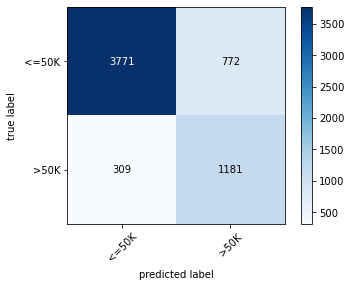

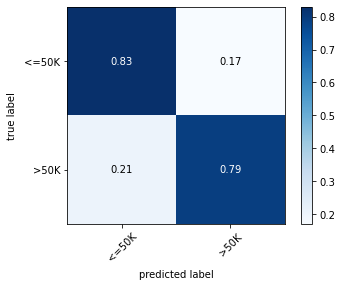

In [153]:
preds = np.round(model3.predict(test_data3))

class_names = np.array([' <=50K', '>50K'])

cm = confusion_matrix(np.array(test_label), preds)

plot_confusion_matrix(conf_mat = cm, class_names = class_names, colorbar = True)
plot_confusion_matrix(conf_mat = cm, class_names = class_names, show_absolute = False, show_normed = True, colorbar = True)
plt.show()

This confusion matrix shows very equally classification for each class, and also provides a higher accuracy than the undersampling technique. The overall accuracy may be lower than just using the main dataset, however the balance in accuracies between the 2 classes that SMOTE provides means it may be a more practical method.

##### Misclasified instances

Now I shall do a brief insight into the misclassifications

In [70]:
wrong_predictions = test_data[preds.T[0] != np.array(test_label)]
index = wrong_predictions.index.values.tolist()
wrong_preds = adult.iloc[index]
wrong_preds

In [81]:
wrong_preds.select_dtypes('int64').columns

Index(['education-num', 'sex', 'hours-per-week', 'native-country', 'income',
       'capital-net-gain'],
      dtype='object')

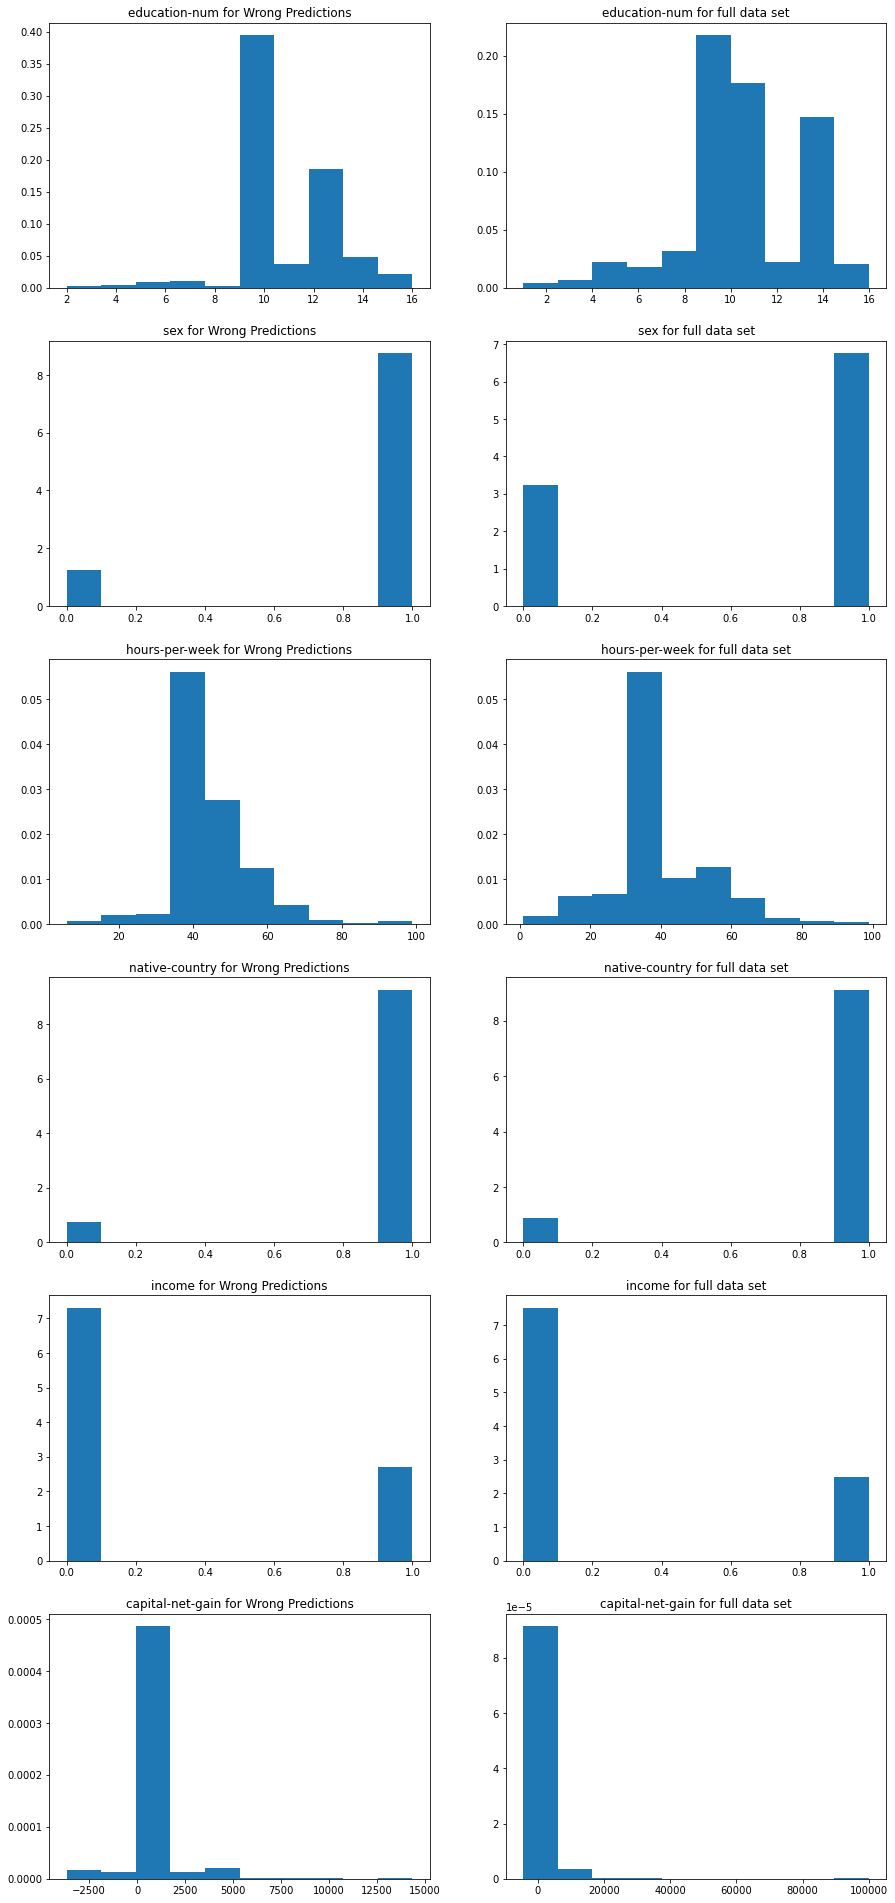

In [115]:
plt.figure(figsize = (15, 40))
count = 1
count2 = 2
for i in wrong_preds.select_dtypes('int64').columns:
    plt.subplot(7, 2, count)
    plt.hist(wrong_preds[i], density = True)
    plt.title(i + ' for Wrong Predictions')
    plt.subplot(7, 2, count2)
    plt.hist(adult[i], density = True)
    plt.title(i + ' for full data set')
    count += 2
    count2 += 2
plt.show()

We see from these histograms that certain features have different proportions. For example there are a higher proportion of males in the wrong predictions than in the full dataset. We also see that if an instance has education number 11, then they are much less likely to be incorrectly classified. 

## Conclusion
We see from our results that neural networks can be a good method for binary classification. We see that we get approx an 85% accuracy rate from the best models. However we due to the imbalanced nature of the dataset we see that all the models classified the majority class with a much higher accuracy. Becuase of this we carried out 2 techniques for dealing with imbalanced datasets: Majoirty Class Under Sampling (MCUS) and SMOTE. When using MCUS the we find that what was once the minority class has greater accuracy than the what was once the majority class. Also the overall acuracy decreases to approx 80%. When using SMOTE the classification accuracies are almost completely balanced and we have an overall accuracy of approx 82% 